In [1]:
import mido
mid = mido.MidiFile('IMSLP221460-WIMA.2591-BWV_1079_1-Part.mid', clip=True)
#mid.tracks
print(mid.tracks)

[MidiTrack([
  MetaMessage('set_tempo', tempo=500000, time=0),
  MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=0, notated_32nd_notes_per_beat=8, time=0),
  MetaMessage('end_of_track', time=0)]), MidiTrack([
  MetaMessage('track_name', name='Violine', time=0),
  MetaMessage('device_name', name='MIDI: Out To MIDI Yoke:  1', time=0),
  Message('program_change', channel=0, program=40, time=0),
  Message('aftertouch', channel=0, value=97, time=0),
  Message('control_change', channel=0, control=7, value=97, time=0),
  Message('pitchwheel', channel=0, pitch=0, time=0),
  Message('control_change', channel=0, control=11, value=63, time=0),
  Message('note_on', channel=0, note=72, velocity=127, time=0),
  Message('note_off', channel=0, note=72, velocity=64, time=730),
  Message('note_on', channel=0, note=75, velocity=127, time=38),
  Message('note_off', channel=0, note=75, velocity=64, time=730),
  Message('note_on', channel=0, note=79, velocity=127, time=38),
  Mess

In [2]:
import numpy as np
notes = np.zeros(372)
print(notes)
bpm = 0
print(type(mid.tracks[0][0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [3]:
tempi = []
for track in mid.tracks:
    for msg in track:
        if msg.type == 'set_tempo':
            tempi.append(msg.tempo)
print(tempi)

[500000]


In [4]:
tempo = tempi[0]
ticks_per_beat = mid.ticks_per_beat
bpm = 60000000/tempo
dt = 60 / (bpm * ticks_per_beat)
print(dt)
print(ticks_per_beat)

0.0013020833333333333
384


[  0.          72.           2.          75.           4.
  79.           6.          80.           8.          71.
  11.          79.          12.          78.          14.
  77.          16.          76.          18.          75.
  21.          74.          22.          73.          23.
  72.          24.          71.          25.          69.
  25.5         67.          26.          72.          27.
  77.          28.          75.          30.          74.
  30.25        75.          30.375       74.          30.5
  75.          30.625       74.          30.75        75.
  30.875       74.          31.          75.          31.125
  74.          31.25        75.          31.375       74.
  31.5         75.          31.625       74.          31.75
  75.          31.875       74.          32.          72.
  33.          84.          34.          78.          35.
  81.          36.          70.          37.          86.
  38.          79.          39.          82.          40.
  75.   

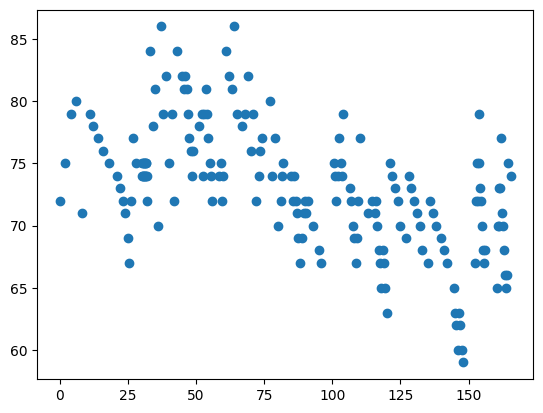

In [5]:
note = 0
beats = []
tones = []
for track in mid.tracks:
    beat = 0
    for msg in track:
        beat += msg.time / ticks_per_beat
        if((msg.type == 'note_on') and (note<371)):
            notes[note] = beat
            beats.append(beat)
            notes[note+1] = msg.note
            tones.append(msg.note)
            
            note += 2
print(notes)
import matplotlib.pyplot as plt
plt.scatter(beats, tones)
plt.show()

40


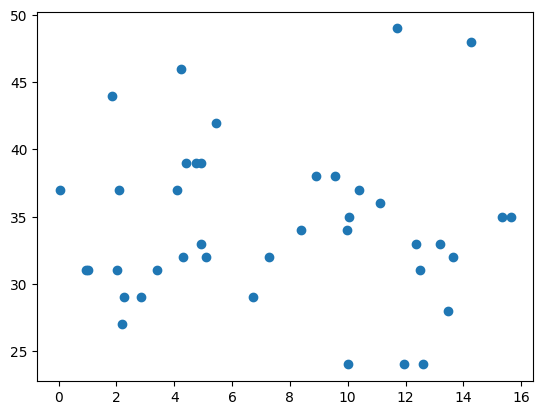

In [6]:
# ::::::::::::::: Random MIDI-Generator::::::::::::::
import random

tonalcenter = random.randint(33, 44) # Van A tot G# om alle toonsoorten te hebben.
rseq = np.zeros(shape=(256,1))
duration = 4 * random.randint(4, 8) # tussen 4 en 8 maten
n_notes = int(round(random.choices([1, 2, 3, 4, 5, 6, 7, 8, 9], [0.075, 0.255, 0.065, 0.25, 0.02, 0.06, 0.015, 0.245, 0.015])[0] * duration * 0.75 * 1.11))
# maal 0.75 omdat je gemiddeld driekwart gebruikt, bijv Jingle Bells: 3,0625 noten per vierkwartsmaat. +11% marge voor verwijderbare noten

rmoments = []
rtones = []
for rnote in range(0, n_notes):
    rmoments.append(random.uniform(0, duration))
    rtones.append(round(np.random.normal(loc=tonalcenter, scale=6)))
rmoments.sort()

print(len(rtones))
plt.scatter(rmoments, rtones)
plt.show()

In [7]:
rmid = mido.MidiFile()
track = mido.MidiTrack()
rmid.tracks.append(track)
tpb = 1680
rmid.ticks_per_beat = tpb

rest = 0
rnote = 0
for rnote in range(0, n_notes-1):
    if((rmoments[rnote+1]-rmoments[rnote])*tpb <= 840):
        track.append(mido.Message('note_on', channel=0, note=rtones[rnote], velocity=127, time=rest))
        track.append(mido.Message('note_off', channel=0, note=rtones[rnote], velocity=96, time=int(round((rmoments[rnote+1]-rmoments[rnote])*tpb))))
        rest = 0

    elif((rmoments[rnote+1]-rmoments[rnote])*tpb > 840):
        track.append(mido.Message('note_on', channel=0, note=rtones[rnote], velocity=127, time=rest))
        track.append(mido.Message('note_off', channel=0, note=rtones[rnote], velocity=96, time=840))
        rest = int(round((rmoments[rnote+1]-rmoments[rnote])*tpb-840))
        
track.append(mido.Message('note_on', channel=0, note=rtones[n_notes-1], velocity=127, time=rest))
track.append(mido.Message('note_off', channel=0, note=rtones[n_notes-1], velocity=96, time=840))    

track.append(mido.MetaMessage('end_of_track'))

rmid.save('random.mid')

In [8]:
def mid2vec(mid):
    # Bepaal tijdseenheden
    tempi = []
    for track in mid.tracks:
        for msg in track:
            if msg.type == 'set_tempo':
                tempi.append(msg.tempo)
    tempo = 500000
    if(len(tempi)>0):
        tempo = tempi[0]
    ticks_per_beat = mid.ticks_per_beat
    bpm = 60000000/tempo
    dt = 60 / (bpm * ticks_per_beat)

    # Maak vector met de noten
    notes = np.zeros(372)
    note = 0
    beats = []
    tones = []
    for track in mid.tracks:
        beat = 0
        for msg in track:
            beat += msg.time / ticks_per_beat
            if((msg.type == 'note_on') and (note<371)):
                notes[note] = beat
                beats.append(beat)
                notes[note+1] = msg.note
                tones.append(msg.note)
                note += 2

    return(notes)
print(mid2vec(mid))

[  0.          72.           2.          75.           4.
  79.           6.          80.           8.          71.
  11.          79.          12.          78.          14.
  77.          16.          76.          18.          75.
  21.          74.          22.          73.          23.
  72.          24.          71.          25.          69.
  25.5         67.          26.          72.          27.
  77.          28.          75.          30.          74.
  30.25        75.          30.375       74.          30.5
  75.          30.625       74.          30.75        75.
  30.875       74.          31.          75.          31.125
  74.          31.25        75.          31.375       74.
  31.5         75.          31.625       74.          31.75
  75.          31.875       74.          32.          72.
  33.          84.          34.          78.          35.
  81.          36.          70.          37.          86.
  38.          79.          39.          82.          40.
  75.   

In [9]:
def randombass():
    tonalcenter = random.randint(33, 44) # Van A tot G# om alle toonsoorten te hebben.
    rseq = np.zeros(shape=(256,1))
    duration = 4 * random.randint(4, 8) # tussen 4 en 8 maten
    n_notes = int(round(random.choices([1, 2, 3, 4, 5, 6, 7, 8, 9], [0.075, 0.255, 0.065, 0.25, 0.02, 0.06, 0.015, 0.245, 0.015])[0] * duration * 0.75 * 1.11))
    # maal 0.75 omdat je gemiddeld driekwart gebruikt, bijv Jingle Bells: 3,0625 noten per vierkwartsmaat. +11% marge voor verwijderbare noten
    
    rmoments = []
    rtones = []
    for rnote in range(0, n_notes):
        rmoments.append(random.uniform(0, duration))
        rtones.append(round(np.random.normal(loc=tonalcenter, scale=6)))
    rmoments.sort()

    rnote = 0
    rnotes = np.zeros(372)
    halfpos = 0
    while(rnote < 371 and halfpos < n_notes):
        rnotes[rnote] = rmoments[halfpos]
        rnotes[rnote+1] = rtones[halfpos]
        halfpos += 1
        rnote += 2
    return(rnotes)

In [10]:
print(randombass())

[ 0.31502952 37.          0.62007118 36.          0.64968361 36.
  0.95915857 32.          1.042064   22.          1.55237812 33.
  2.15293778 28.          2.33509544 24.          2.73684519 30.
  3.04111505 33.          4.36600049 31.          4.67257302 28.
  4.68839127 39.          4.85562598 39.          5.12166189 39.
  5.24498466 34.          7.10562121 28.          7.24710066 37.
  7.81095054 37.          8.16686411 44.          9.4264994  33.
  9.60255998 37.          9.67372755 43.          9.85655495 40.
  9.9106561  30.         10.08312808 46.         10.34960807 37.
 10.71365619 32.         11.39278353 25.         12.74025203 33.
 12.80789848 22.         13.03054306 24.         13.40993851 31.
 13.65422467 43.         14.25352203 29.         14.56280871 19.
 14.85089104 32.         15.02817831 40.         15.05035468 38.
 15.49653644 36.         16.13058076 31.         18.88571457 30.
 19.36625778 40.         19.38462165 36.         19.6723361  33.
 19.97544358 37.         

In [11]:
# Import dataset
import os
directory = 'BASSmidis'

filepaths = []
for filename in os.scandir(directory):
    if filename.is_file():
        filepaths.append(filename.path)
print(filepaths)

['BASSmidis\\005 - deadmau5 bass.mid', 'BASSmidis\\006 - hardwell bass.mid', 'BASSmidis\\01 c minor bass.mid', 'BASSmidis\\01 c sharp bass.mid', 'BASSmidis\\01 dms ttl1 bass.mid', 'BASSmidis\\016 - paul van dyk bass.mid', 'BASSmidis\\017 - nicky romero bass.mid', 'BASSmidis\\019 bass.mid', 'BASSmidis\\01a sub bass.mid', 'BASSmidis\\02 c major bass.mid', 'BASSmidis\\02 dms ttl1 bass.mid', 'BASSmidis\\02 f bass.mid', 'BASSmidis\\02 g bass.mid', 'BASSmidis\\024 - dada life bass.mid', 'BASSmidis\\026 - fedde le grand bass.mid', 'BASSmidis\\029 - laidback luke bass.mid', 'BASSmidis\\02b flux bass.mid', 'BASSmidis\\02b nuke em bass.mid', 'BASSmidis\\02c flux bass.mid', 'BASSmidis\\02c nuke em bass.mid', 'BASSmidis\\03 d minor bass.mid', 'BASSmidis\\03 dms ttl1 bass.mid', 'BASSmidis\\034 bass.mid', 'BASSmidis\\035 - chuckie bass.mid', 'BASSmidis\\036 - zatox bass.mid', 'BASSmidis\\037 bass.mid', 'BASSmidis\\039 - cosmic gate bass.mid', 'BASSmidis\\03b neuro funk bass.mid', 'BASSmidis\\03b sub

In [12]:
dataset = []
for path in filepaths:
    mid = mido.MidiFile(path, clip=True)
    dataset.append(mid2vec(mid))

In [13]:
def adderror(notes):
    noteserr = np.copy(notes)
    n_notes = int(round(np.count_nonzero(noteserr)/2))
    dice = random.randint(1, 10)
    if(dice < 7):
        errpos = random.randint(0, n_notes - 1) * 2
        noteserr[errpos] += np.random.normal(loc=0, scale=1)
    else:
        errpos = random.randint(1, n_notes) * 2 - 1
        noteserr[errpos] += round(np.random.normal(loc=0, scale=6))
    return(noteserr)

In [16]:
# Genereer basslines met error

errorN = []
errorN_2 = []
errorN_3 = []
errorN_4 = []
piece = 0
numpieces = len(dataset)
while(piece < numpieces):
    #print(filepaths[piece])
    numnotes = int(round(np.count_nonzero(dataset[piece])))
    e1 = dataset[piece]
    e2 = dataset[piece]
    e3 = dataset[piece]
    e4 = dataset[piece]
    for cycle in range(0, numnotes):
        e1 = adderror(e1)
        e2 = adderror(e2)
        e3 = adderror(e3)
        e4 = adderror(e4)
    errorN.append(e1)
    errorN_2.append(e2)
    errorN_3.append(e3)
    errorN_4.append(e4)
    piece += 1
piece = 0

In [17]:
def normalize(notes):
    note = 0
    while(note < 372):
        notes[note] *= 1/24 # gemiddeld aantal beats in een random-fragment
        notes[note+1] = (notes[note+1])/60 # Middle C = 1
        note += 2
    return(notes)

In [18]:
def denormalize(notes):
    note = 0
    while(note < 372):
        notes[note] *= 24 # gemiddeld aantal beats in een random-fragment
        notes[note+1] = int(round((notes[note+1])*60)) # Middle C = 60
        note += 2
    return(notes)

In [19]:
piece = 0
normalizeddata = np.copy(dataset)
normalizederrorN = np.copy(errorN)
normalizederrorN_2 = np.copy(errorN_2)
normalizederrorN_3 = np.copy(errorN_3)
normalizederrorN_4 = np.copy(errorN_4)
while(piece < numpieces):
    normalizeddata[piece] = normalize(normalizeddata[piece])
    normalizederrorN[piece] = normalize(normalizederrorN[piece])
    normalizederrorN_2[piece] = normalize(normalizederrorN_2[piece])
    normalizederrorN_3[piece] = normalize(normalizederrorN_3[piece])
    normalizederrorN_4[piece] = normalize(normalizederrorN_4[piece])
    piece += 1

In [20]:
y = np.concatenate((normalizeddata, normalizeddata, normalizeddata, normalizeddata))
X = np.concatenate((normalizederrorN, normalizederrorN_2, normalizederrorN_3, normalizederrorN_4))

## === NEURAAL NET 2, TRAINEN OP N_notes fouten, 1 net ===

In [21]:
import tensorflow as tf
import keras
from keras import layers

model = keras.Sequential()
model.add(layers.Dense(372, activation='sigmoid', input_shape=(372,)))
model.add(layers.Dense(372, activation='sigmoid'))
model.add(layers.Dense(372, activation='sigmoid'))
model.add(layers.Dense(372, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 372)               138756    
                                                                 
 dense_1 (Dense)             (None, 372)               138756    
                                                                 
 dense_2 (Dense)             (None, 372)               138756    
                                                                 
 dense_3 (Dense)             (None, 372)               138756    
                                                                 
Total params: 555024 (2.12 MB)
Trainable params: 555024 (2.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='LogCosh', optimizer=opt, metrics='accuracy')
model.fit(X, y, batch_size=2, epochs=2, validation_split=0.1)

Epoch 1/2
6466/6466 [==============================] - 99s 15ms/step - loss: 31.0571 - accuracy: 0.0951 - val_loss: 0.0649 - val_accuracy: 0.0905
Epoch 2/2
6466/6466 [==============================] - 96s 15ms/step - loss: 31.0559 - accuracy: 0.1050 - val_loss: 0.0648 - val_accuracy: 0.0905


In [ ]:
#model.save('Model1dropout2.keras')

In [27]:
model2 = keras.models.load_model('model1.keras')
noise = normalize(randombass())
n_notes = int(round(np.count_nonzero(noise)/2))
input = tf.expand_dims(noise, axis=0)
print(input)
cycle = 0
while(cycle < 1):
    input = model.predict(input)
    cycle += 1
output = input
print(output)

tf.Tensor(
[[0.00515156 0.68333333 0.01109424 0.56666667 0.03785877 0.55
  0.05105102 0.63333333 0.06073366 0.5        0.10714028 0.56666667
  0.10739702 0.56666667 0.11322674 0.6        0.11517465 0.38333333
  0.11950474 0.5        0.1262903  0.68333333 0.15524273 0.63333333
  0.16458884 0.2        0.22783374 0.65       0.234065   0.61666667
  0.23505077 0.6        0.23702612 0.35       0.25880322 0.55
  0.27915402 0.61666667 0.28039505 0.63333333 0.29708247 0.66666667
  0.30902126 0.53333333 0.31765672 0.7        0.31790559 0.48333333
  0.33590268 0.6        0.34013036 0.55       0.34274129 0.7
  0.36698808 0.53333333 0.38473143 0.53333333 0.40336705 0.55
  0.41218433 0.63333333 0.4350297  0.6        0.449544   0.65
  0.46089046 0.56666667 0.46371971 0.46666667 0.48275878 0.55
  0.49372435 0.66666667 0.52143867 0.41666667 0.52161797 0.48333333
  0.53234732 0.68333333 0.55643448 0.5        0.57332508 0.5
  0.58452789 0.5        0.61527867 0.46666667 0.66018266 0.7
  0.69097193 0.41666

In [28]:
print(output[0])
AInotes = denormalize(output[0])
print(output[0])
print(AInotes)

[2.24376693e-02 7.10798502e-01 6.03583641e-02 0.00000000e+00
 7.41524771e-02 7.65528798e-01 0.00000000e+00 0.00000000e+00
 1.21950835e-01 7.43289649e-01 0.00000000e+00 7.46894181e-01
 1.57191008e-01 0.00000000e+00 1.68783605e-01 7.28674829e-01
 1.73848435e-01 6.89497054e-01 1.82933539e-01 6.68348789e-01
 0.00000000e+00 0.00000000e+00 1.99110612e-01 6.49836600e-01
 0.00000000e+00 0.00000000e+00 1.97140560e-01 0.00000000e+00
 1.92914143e-01 0.00000000e+00 2.09150538e-01 0.00000000e+00
 1.94978535e-01 0.00000000e+00 2.02218279e-01 5.23517191e-01
 1.86953142e-01 0.00000000e+00 2.02716649e-01 4.91666436e-01
 1.91946998e-01 4.70589280e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.32379216e-01
 0.00000000e+00 3.91668439e-01 1.99010015e-01 0.00000000e+00
 1.89169005e-01 0.00000000e+00 0.00000000e+00 3.75567317e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.73084021e-01 0.00000000e+00 1.76566586e-01 3.30133855e-01
 1.38330922e-01 2.587807

In [29]:
def notes2mid(notes):
    mid = mido.MidiFile()
    track = mido.MidiTrack()
    mid.tracks.append(track)
    tpb = 1680
    mid.ticks_per_beat = tpb

    points = []
    index = 0
    while(index < 372):
        if((notes[index+1] > 6) and (notes[index+1] < 128)):
            points.append([notes[index], notes[index+1]])
        index = index + 2

    print(len(points))
    index = 0
    points = sorted(points)
    n_notes = len(points)
    moments = []
    tones = []
    while(index < n_notes):
        moments.append(points[index][0])
        tones.append(points[index][1])
        index += 1
    
    rest = 0
    note = 0
    for note in range(0, n_notes-1):
        if((moments[note+1]-moments[note])*tpb <= 840):
            track.append(mido.Message('note_on', channel=0, note=int(tones[note]), velocity=127, time=rest))
            track.append(mido.Message('note_off', channel=0, note=int(tones[note]), velocity=96, time=int(round((moments[note+1]-moments[note])*tpb))))
            rest = 0
    
        elif((moments[note+1]-moments[note])*tpb > 840):
            track.append(mido.Message('note_on', channel=0, note=int(tones[note]), velocity=127, time=rest))
            track.append(mido.Message('note_off', channel=0, note=int(tones[note]), velocity=96, time=840))
            rest = int(round((moments[note+1]-moments[note])*tpb-840))
            
    track.append(mido.Message('note_on', channel=0, note=int(tones[n_notes-1]), velocity=127, time=rest))
    track.append(mido.Message('note_off', channel=0, note=int(tones[n_notes-1]), velocity=96, time=840))    
    
    track.append(mido.MetaMessage('end_of_track'))
    
    mid.save('AI2.mid')
    plt.scatter(moments, tones)
    plt.show()
    return("Saved AI2.mid")

37


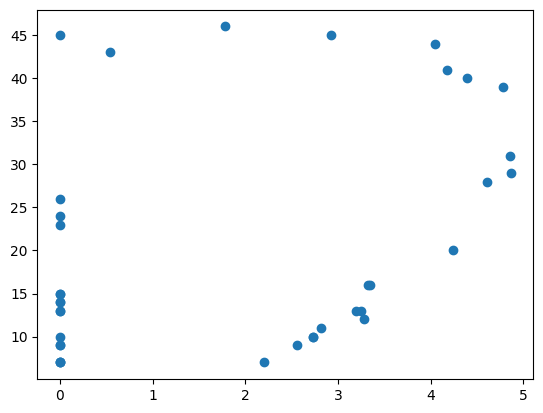

Saved AI2.mid


In [30]:
print(notes2mid(AInotes))